In [1]:
#Import libraries and import the excel file
import pandas as pd
import numpy as np
import plotly.express as px

collar_data_import = pd.read_csv("Data&Systems_Data.csv")

In [2]:
#copy the original file so no changes can be made 
df_1 = collar_data_import.copy()
df_1.head()

,longitude,latitude,odba,NZDT,serial_number,pitch,roll,heading
0,1755903383,-376792167,952,2023/11/22 10:11,004-0010-00562,0.098045,0.712305,354.456898
1,1755903383,-376792167,258,2023/11/22 10:11,004-0010-00562,-0.090663,0.627568,354.639435
2,1755903400,-376792167,666,2023/11/22 10:11,004-0010-00562,-0.156609,0.026911,353.375315
3,1755903400,-376792183,320,2023/11/22 10:11,004-0010-00562,-0.448115,0.379047,353.842375
4,1755903400,-376792183,403,2023/11/22 10:11,004-0010-00562,-0.582295,1.248040,352.699415


In [3]:
#checking all the types for columns
df_1.dtypes

longitude          int64
latitude           int64
odba               int64
NZDT              object
serial_number     object
pitch            float64
roll             float64
heading          float64
dtype: object

In [4]:
# make another copy
df_new = df_1.copy()

In [5]:
#change NZDT types to datetime and The second line checks if any of the years in the "NZDT" 
#column are equal to 2024. 
#If there are, it adds one day to the datetime values
#Now we convert the years back to 2022 assuming that we recorded the data that time.
df_new["NZDT"] = pd.to_datetime(df_new["NZDT"])
if (df_new["NZDT"].dt.year == 2024).any():
    df_new.loc[df_new["NZDT"].dt.year == 2024, "NZDT"] += pd.Timedelta(days=1)

df_new['NZDT'] = df_new['NZDT'].apply(lambda x: x.replace(year=2022))
df_new.head()

,longitude,latitude,odba,NZDT,serial_number,pitch,roll,heading
0,1755903383,-376792167,952,2022-11-22 10:11:00,004-0010-00562,0.098045,0.712305,354.456898
1,1755903383,-376792167,258,2022-11-22 10:11:00,004-0010-00562,-0.090663,0.627568,354.639435
2,1755903400,-376792167,666,2022-11-22 10:11:00,004-0010-00562,-0.156609,0.026911,353.375315
3,1755903400,-376792183,320,2022-11-22 10:11:00,004-0010-00562,-0.448115,0.379047,353.842375
4,1755903400,-376792183,403,2022-11-22 10:11:00,004-0010-00562,-0.582295,1.248040,352.699415


In [6]:
#f_new = df_1.copy
#df_new["NZDT"] = pd.to_datetime(df_new["NZDT"])
#df_new['NZDT'] = df_new['NZDT'].apply(lambda x: x.replace(year=2022))
#df_new.head()

In [8]:
df_new.dtypes

longitude                 int64
latitude                  int64
odba                      int64
NZDT             datetime64[ns]
serial_number            object
pitch                   float64
roll                    float64
heading                 float64
dtype: object

In [9]:
#Data has been collected from 6 cows but there exist 7 serial numbers
df_1.groupby(by = ["serial_number"]).size()

serial_number
004-0010-00562    41820
004-0011-00176    42110
004-0011-01185     7380
004-0015-01111    30395
004-9035-00398    42320
004-9037-00232    41540
004-9038-00041    43870
dtype: int64

In [10]:
#Split the data into 7 different variables because we have 7 serial number
data1 = df_new[df_new["serial_number"]== "004-0010-00562"]
data2 = df_new[df_new["serial_number"]== "004-0011-00176"]
data3 = df_new[df_new["serial_number"]== "004-0011-01185"]
data4 = df_new[df_new["serial_number"]== "004-0015-01111"]
data5 = df_new[df_new["serial_number"]== "004-9035-00398"]
data6 = df_new[df_new["serial_number"]== "004-9037-00232"]
data7 = df_new[df_new["serial_number"]== "004-9038-00041"]
data3.groupby(by = ["serial_number"]).size()

serial_number
004-0011-01185    7380
dtype: int64

In [11]:
#checking the NZDT date 
data1.head()

,longitude,latitude,odba,NZDT,serial_number,pitch,roll,heading
0,1755903383,-376792167,952,2022-11-22 10:11:00,004-0010-00562,0.098045,0.712305,354.456898
1,1755903383,-376792167,258,2022-11-22 10:11:00,004-0010-00562,-0.090663,0.627568,354.639435
2,1755903400,-376792167,666,2022-11-22 10:11:00,004-0010-00562,-0.156609,0.026911,353.375315
3,1755903400,-376792183,320,2022-11-22 10:11:00,004-0010-00562,-0.448115,0.379047,353.842375
4,1755903400,-376792183,403,2022-11-22 10:11:00,004-0010-00562,-0.582295,1.248040,352.699415


In [12]:
#making sure the date increment by 1 next day
data1.tail()

,longitude,latitude,odba,NZDT,serial_number,pitch,roll,heading
41815,1755887900,-376871533,2471,2022-11-23 09:13:00,004-0010-00562,-33.338960,10.824896,252.698378
41816,1755887900,-376871533,415,2022-11-23 09:13:00,004-0010-00562,-31.108548,14.303449,251.367882
41817,1755887900,-376871533,2996,2022-11-23 09:13:00,004-0010-00562,-32.441940,17.081111,267.955888
41818,1755887900,-376871550,717,2022-11-23 09:13:00,004-0010-00562,-28.915565,12.137690,264.973035
41819,1755887900,-376871550,1335,2022-11-23 09:13:00,004-0010-00562,-30.552178,23.400449,273.405247


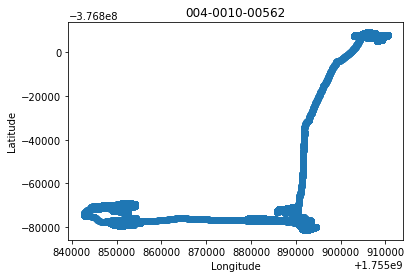

In [13]:
#plot the longitude and latitude graph for each serial number 
import matplotlib.pyplot as plt
plt.scatter(data1["longitude"], data1["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-0010-00562")
plt.show()

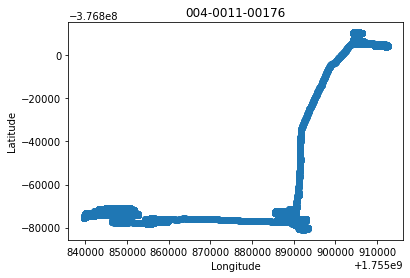

In [14]:
import matplotlib.pyplot as plt
plt.scatter(data2["longitude"], data2["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-0011-00176")
plt.show()

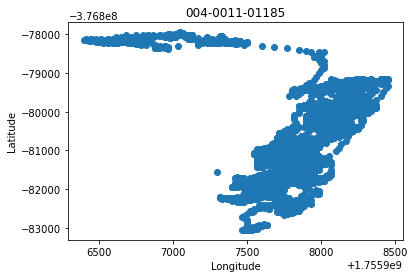

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data3["longitude"], data3["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-0011-01185")
plt.show()

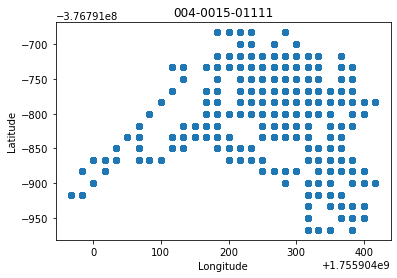

In [16]:
import matplotlib.pyplot as plt
plt.scatter(data4["longitude"], data4["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-0015-01111")
plt.show()

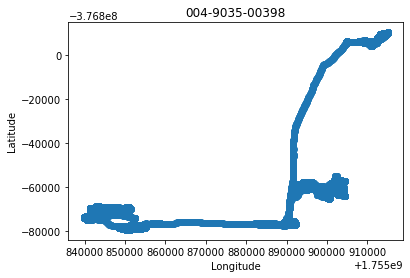

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data5["longitude"], data5["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-9035-00398")
plt.show()

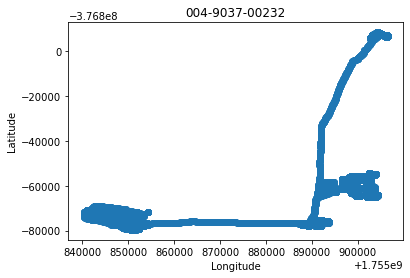

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data6["longitude"], data6["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-9037-00232")
plt.show()

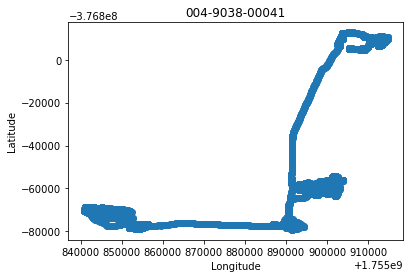

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data7["longitude"], data7["latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("004-9038-00041")
plt.show()